In [2]:
# Import libraries
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
import matplotlib.pyplot as plt

# Initialize runtime service and backend
service = QiskitRuntimeService()
backend = service.backend(name = "ibm_brisbane")
#backend = service.least_busy(simulator=False, operational=True)

%matplotlib inline

In [3]:
# Function used to show the figure of a circuit, simulate it and display the counts of each state
def circuitResults(title, qc):
    # Show figure of circuit
    fig = qc.draw("mpl")
    fig.suptitle(title)
    plt.show()

    # Simulator
    simulatorUsed = AerSimulator()
    transpiled_circuit = transpile(qc, simulatorUsed)
    result = simulatorUsed.run(transpiled_circuit).result()

    # Get counts of states
    counts = result.get_counts(transpiled_circuit)
    print(counts)

    # Histogram of counts
    plot_histogram(counts)
    plt.show()

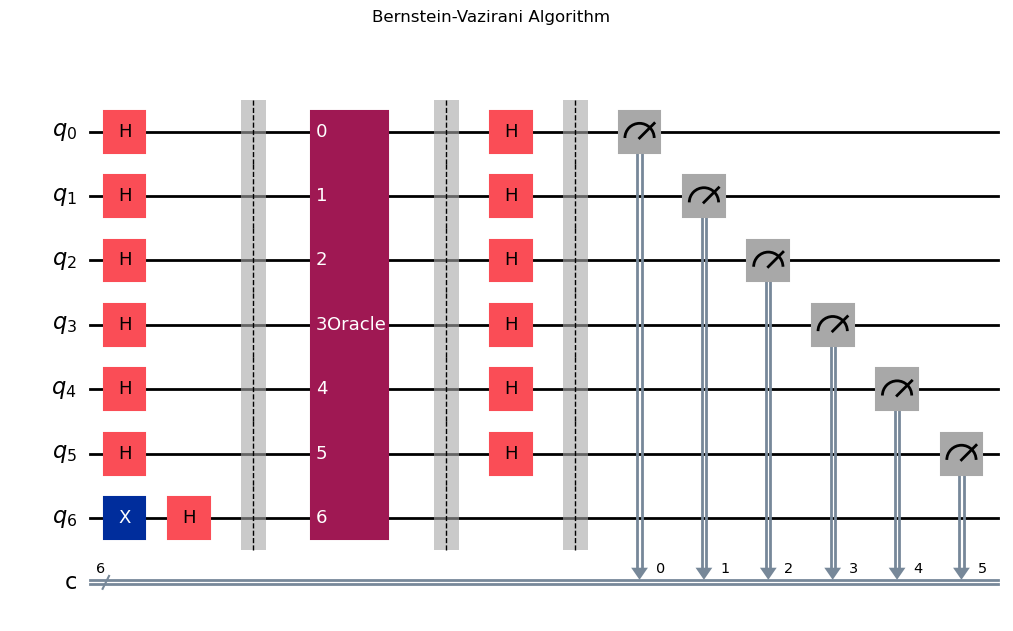

{'110100': 1024}


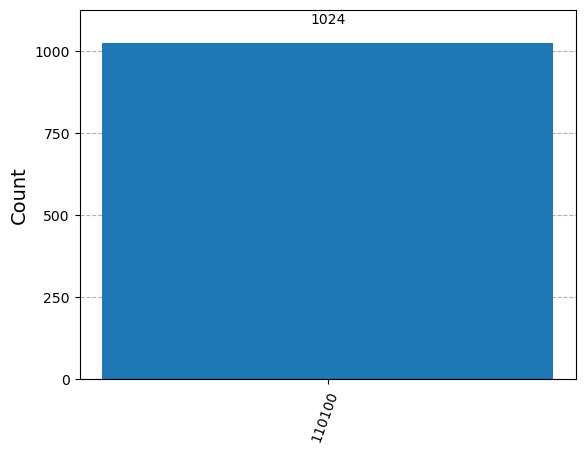

Job ID is cysavexy9d80008d6j30
{'110100': 3349, '010100': 163, '111100': 233, '110000': 113, '000001': 1, '110101': 31, '100100': 67, '011100': 13, '110111': 1, '000000': 30, '110010': 1, '001010': 1, '100000': 8, '000100': 14, '110110': 31, '111110': 3, '100110': 1, '010000': 10, '101100': 6, '111000': 9, '001100': 2, '010110': 1, '111101': 1, '011001': 1, '010101': 2, '011000': 2, '001000': 2}
Hidden string: 110100
Discovered string: 110100


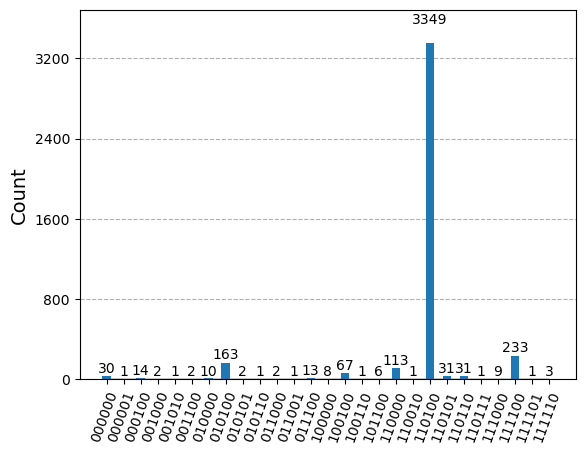

In [10]:
# Define the hidden bitstring
hidden_string = "110100"
n = len(hidden_string)  # Number of qubits

# Oracle subcircuit
oracle = QuantumCircuit(n + 1, name="Oracle")

# Apply CNOT gates based on the hidden string
for i, bit in enumerate(reversed(hidden_string)):  # Reverse to match Qiskit indexing
    if bit == "1":
        oracle.cx(i, n)

# Convert oracle to a gate
oracle_gate = oracle.to_gate(label="Oracle")

# Create the Bernstein-Vazirani quantum circuit
qc = QuantumCircuit(n + 1, n)

# Initialize the last qubit in |1⟩ state (for phase kickback)
qc.x(n)  # Set last qubit to |1⟩
qc.h(n)  # Apply Hadamard

# Apply Hadamard gates to all input qubits
qc.h(range(n))

qc.barrier()

# Apply the Oracle
qc.append(oracle_gate, range(n + 1))

qc.barrier()

# Apply Hadamard gates to the input qubits
for qubit in range(n):
    qc.h(qubit)

qc.barrier()

# Measure the first n qubits
qc.measure(range(n), range(n))

# Run on simulator
circuitResults("Bernstein-Vazirani Algorithm", qc)

# Run on IBM hardware
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
# Wait for the job to complete and get the result
job_result = job.result()
pub_result = job_result[0]
# Get the counts from the result
counts = pub_result.data.c.get_counts()
print(f"{counts}")

hidden_s_discovered = list(counts.keys())[0]

# Print results
print("Hidden string:", hidden_string)
print("Discovered string:", hidden_s_discovered)

# Visualize the result
plot_histogram(counts)
plt.hist(counts, bins=30, color='skyblue', edgecolor='black')
plt.show()

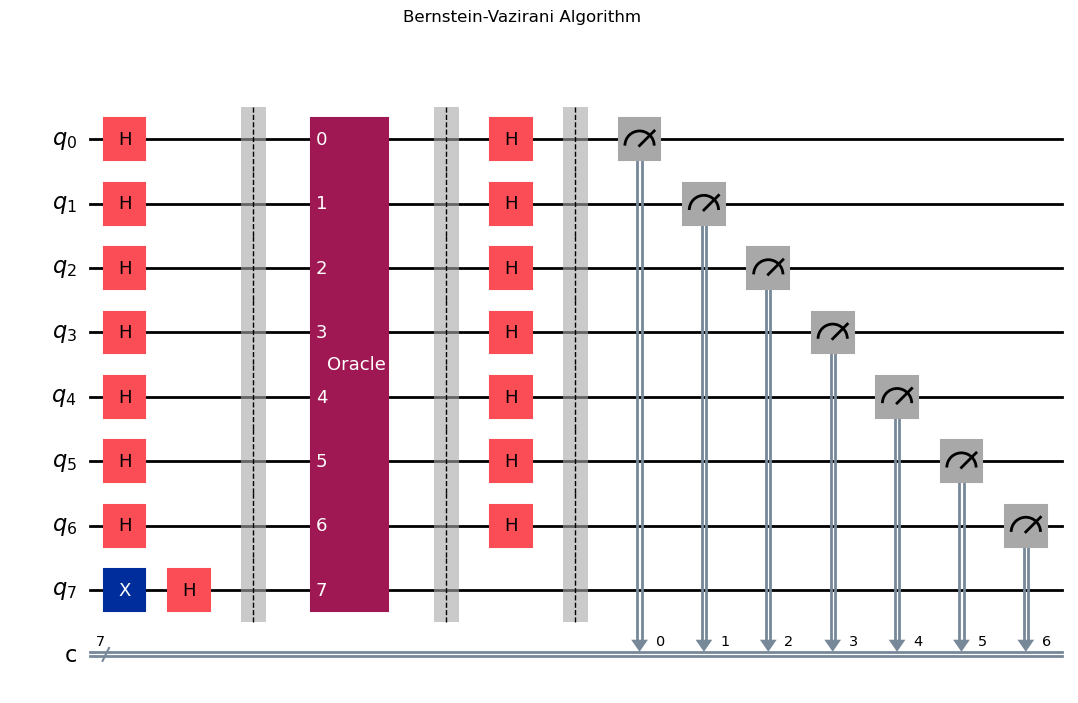

{'1101001': 1024}


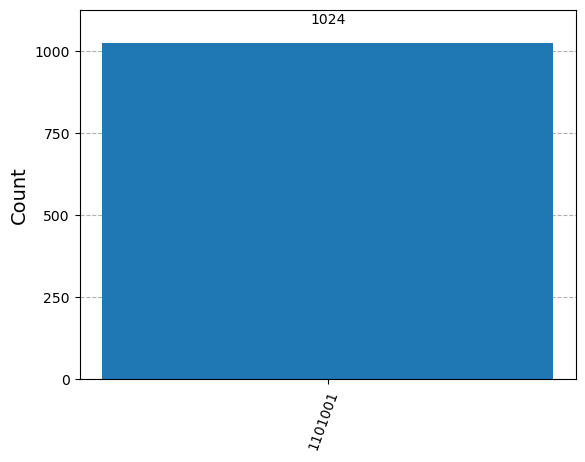

Job ID is cysaz8dr32sg008ad690
{'1101001': 2014, '0000001': 283, '1111001': 537, '1001001': 86, '0010000': 8, '1001100': 1, '0001001': 68, '0100001': 42, '0101001': 244, '1000011': 1, '0010001': 50, '0111001': 63, '1100000': 8, '1110001': 75, '1001000': 21, '1101101': 32, '1111011': 6, '0101011': 8, '0110000': 2, '1000001': 49, '1101011': 46, '1111000': 14, '1011001': 15, '1100001': 219, '1101000': 48, '1010001': 8, '0100000': 7, '0101000': 7, '0001000': 5, '1011000': 5, '0000000': 23, '0011001': 14, '1000000': 7, '0110001': 10, '1100101': 5, '0111011': 1, '1100011': 6, '0000011': 9, '0000101': 6, '0101101': 5, '1001011': 2, '0010011': 2, '1000101': 1, '1001101': 2, '1100010': 1, '0010101': 1, '1111101': 7, '0001011': 4, '1101010': 3, '0100101': 1, '1110000': 1, '1010000': 4, '0001101': 2, '0111101': 1, '1101100': 1, '1110011': 1, '1110111': 1, '1101111': 1, '0000100': 1, '1011010': 1}
Hidden string: 1101001
Discovered string: 1101001


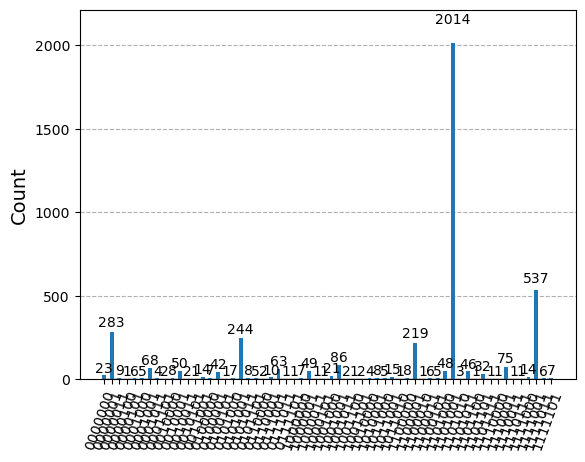

In [13]:
# Define the hidden bitstring
hidden_string = "1101001"
n = len(hidden_string)  # Number of qubits

# Oracle subcircuit
oracle = QuantumCircuit(n + 1, name="Oracle")

# Apply CNOT gates based on the hidden string
for i, bit in enumerate(reversed(hidden_string)):  # Reverse to match Qiskit indexing
    if bit == "1":
        oracle.cx(i, n)

# Convert oracle to a gate
oracle_gate = oracle.to_gate(label="Oracle")

# Create the Bernstein-Vazirani quantum circuit
qc = QuantumCircuit(n + 1, n)

# Initialize the last qubit in |1⟩ state (for phase kickback)
qc.x(n)  # Set last qubit to |1⟩
qc.h(n)  # Apply Hadamard

# Apply Hadamard gates to all input qubits
qc.h(range(n))

qc.barrier()

# Apply the Oracle
qc.append(oracle_gate, range(n + 1))

qc.barrier()

# Apply Hadamard gates to the input qubits
for qubit in range(n):
    qc.h(qubit)

qc.barrier()

# Measure the first n qubits
qc.measure(range(n), range(n))

# Run on simulator
circuitResults("Bernstein-Vazirani Algorithm", qc)

# Run on IBM hardware
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
# Wait for the job to complete and get the result
job_result = job.result()
pub_result = job_result[0]
# Get the counts from the result
counts = pub_result.data.c.get_counts()
print(f"{counts}")

hidden_s_discovered = list(counts.keys())[0]

# Print results
print("Hidden string:", hidden_string)
print("Discovered string:", hidden_s_discovered)

# Visualize the result
plot_histogram(counts)
plt.hist(counts, bins=30, color='skyblue', edgecolor='black')
plt.show()

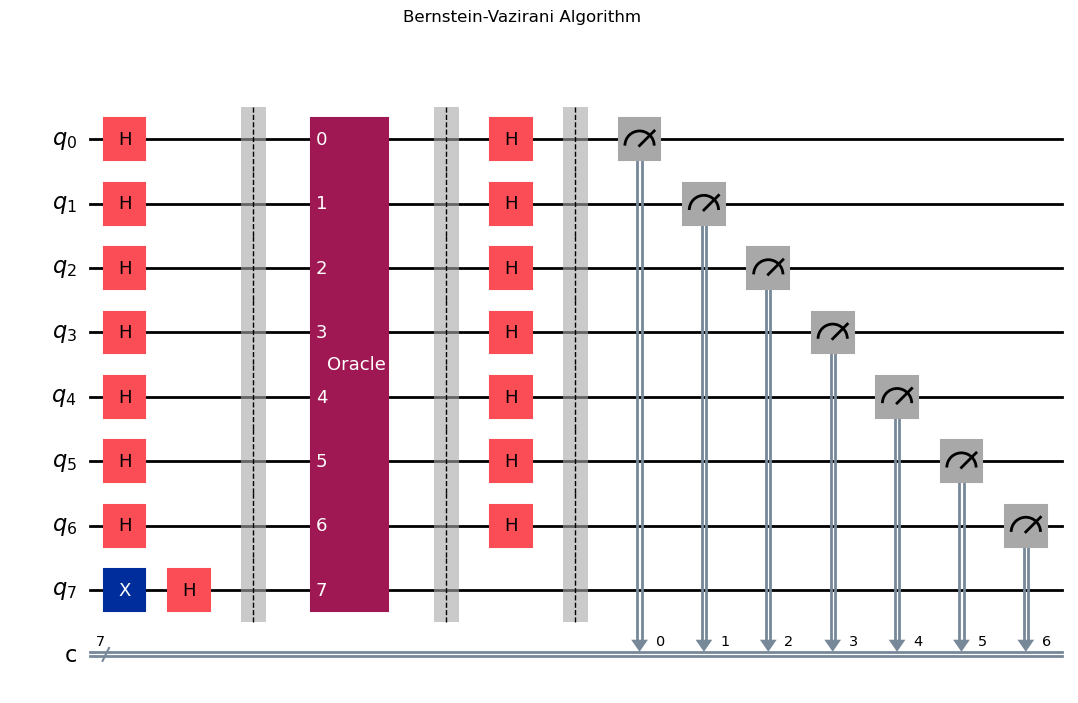

{'1101001': 1024}


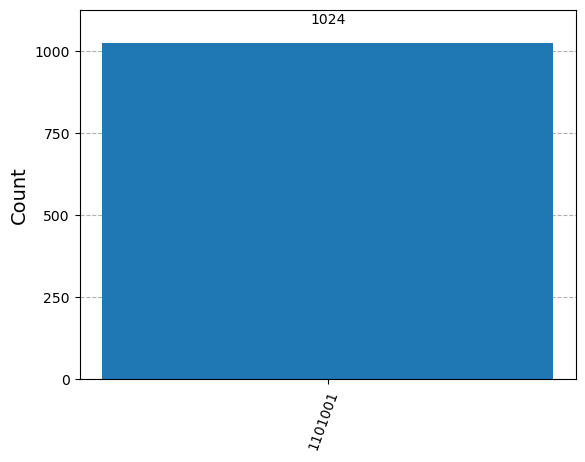

Job ID is cysb3zfmjve0008c028g
{'1101001': 2673, '0000000': 12, '1111001': 493, '0001001': 33, '1001001': 131, '1101101': 44, '0101001': 79, '1100001': 177, '1011001': 20, '1101000': 72, '0000001': 98, '0010001': 24, '0100000': 6, '0101011': 4, '0110001': 4, '1110001': 31, '0010000': 8, '0100001': 16, '0111001': 15, '1111000': 15, '0111000': 11, '1010000': 1, '1000001': 8, '1101011': 33, '1110000': 3, '0101000': 30, '0011001': 9, '1111011': 3, '1100011': 4, '1001000': 5, '0001101': 2, '0000101': 2, '0000011': 3, '0001000': 3, '1111101': 6, '0000100': 1, '1000000': 4, '1101100': 2, '0100101': 1, '1001011': 3, '1010001': 2, '1100000': 2, '0100011': 1, '1100101': 1, '1011000': 1}
Hidden string: 1101001
Discovered string: 1101001


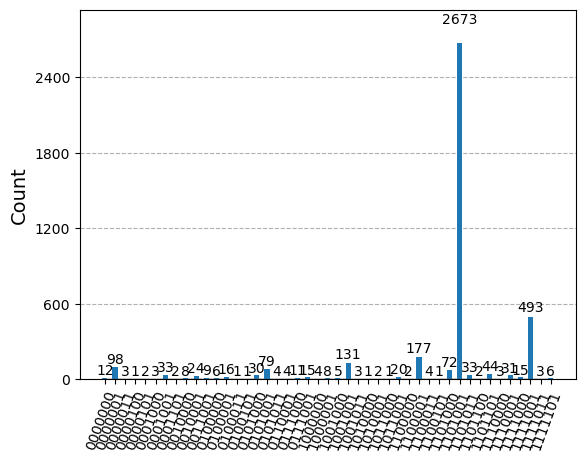

In [7]:
# Define the hidden bitstring
hidden_string = "1101001"
n = len(hidden_string)  # Number of qubits

# Oracle subcircuit
oracle = QuantumCircuit(n + 1, name="Oracle")

# Apply CNOT gates based on the hidden string
for i, bit in enumerate(reversed(hidden_string)):  # Reverse to match Qiskit indexing
    if bit == "1":
        oracle.cx(i, n)

# Convert oracle to a gate
oracle_gate = oracle.to_gate(label="Oracle")

# Create the Bernstein-Vazirani quantum circuit
qc = QuantumCircuit(n + 1, n)

# Initialize the last qubit in |1⟩ state (for phase kickback)
qc.x(n)  # Set last qubit to |1⟩
qc.h(n)  # Apply Hadamard

# Apply Hadamard gates to all input qubits
qc.h(range(n))

qc.barrier()

# Apply the Oracle
qc.append(oracle_gate, range(n + 1))

qc.barrier()

# Apply Hadamard gates to the input qubits
for qubit in range(n):
    qc.h(qubit)

qc.barrier()

# Measure the first n qubits
qc.measure(range(n), range(n))

# Run on simulator
circuitResults("Bernstein-Vazirani Algorithm", qc)

# Run on IBM hardware
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
# Wait for the job to complete and get the result
job_result = job.result()
pub_result = job_result[0]
# Get the counts from the result
counts = pub_result.data.c.get_counts()
print(f"{counts}")

hidden_s_discovered = list(counts.keys())[0]

# Print results
print("Hidden string:", hidden_string)
print("Discovered string:", hidden_s_discovered)

# Visualize the result
plot_histogram(counts)
plt.hist(counts, bins=30, color='skyblue', edgecolor='black')
plt.show()